In [1]:
import json
from copy import deepcopy
import numpy as np

In [2]:
with open('once-through.json') as f:
    ot = json.load(f)

In [3]:
lwr = ot['simulation']['facility'][1]

In [4]:
lwr

{'config': {'Reactor': {'assem_size': 33000,
   'cycle_time': 18,
   'fuel_incommods': {'val': 'Fresh-UOX-Fuel'},
   'fuel_inrecipes': {'val': 'FF-UOX'},
   'fuel_outcommods': {'val': 'Used-UOX-Fuel'},
   'fuel_outrecipes': {'val': 'UF-UOX'},
   'n_assem_batch': 1,
   'n_assem_core': 3,
   'power_cap': 1000,
   'refuel_time': 1}},
 'lifetime': 720,
 'name': 'LWR'}

In [5]:
n_rx = 100
np.linspace(1, 40 * 12, n_rx, dtype=int)

array([  1,   5,  10,  15,  20,  25,  30,  34,  39,  44,  49,  54,  59,
        63,  68,  73,  78,  83,  88,  92,  97, 102, 107, 112, 117, 121,
       126, 131, 136, 141, 146, 150, 155, 160, 165, 170, 175, 180, 184,
       189, 194, 199, 204, 209, 213, 218, 223, 228, 233, 238, 242, 247,
       252, 257, 262, 267, 271, 276, 281, 286, 291, 296, 300, 305, 310,
       315, 320, 325, 330, 334, 339, 344, 349, 354, 359, 363, 368, 373,
       378, 383, 388, 392, 397, 402, 407, 412, 417, 421, 426, 431, 436,
       441, 446, 450, 455, 460, 465, 470, 475, 480])

In [6]:
lwrs = []
for i, life in enumerate(np.linspace(1, 40 * 12, n_rx, dtype=int), 0):
    l = deepcopy(lwr)
    l['name'] = 'LWR-Init{0:02}'.format(i)
    l['lifetime'] = int(life)
    l['config']['Reactor']['cycle_step'] = 18 - int(life%18)
    lwrs.append(l)

In [7]:
with open('initial-lwrs.json', 'w') as f:
    json.dump(lwrs, f)

In [8]:
ifl = [{'number': '1', 'prototype': l['name']} for l in lwrs]

In [9]:
ifl[-1]

{'number': '1', 'prototype': 'LWR-Init99'}

In [10]:
with open('initial-facs.json', 'w') as f:
    json.dump(ifl, f)

Nicely done

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
import cymetric as cym

/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [30]:
db = cym.dbopen('ot.h5')

In [31]:
evaler = cym.Evaluator(db)

In [32]:
ts = evaler.eval('TimeSeriesPower')

In [33]:
import pandas as pd

In [34]:
df = pd.DataFrame({'Time': ts.Time.apply(lambda x: x//12), 
                   'GWe': ts.Value.apply(lambda x: 1e-3*x/12)})

In [35]:
grouped = df.groupby('Time').sum()

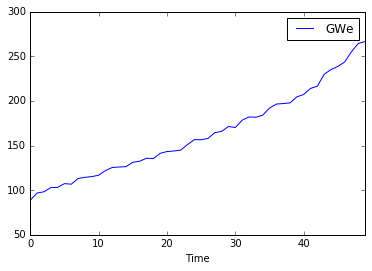

In [36]:
grouped.plot()

In [20]:
250000//12

20833

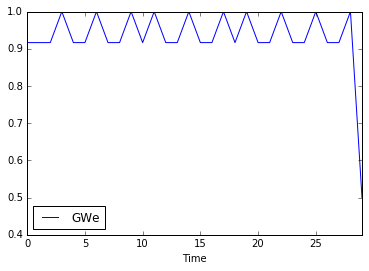

In [21]:
agn = ts[ts.AgentId == 190]
df = pd.DataFrame({'Time': agn.Time.apply(lambda x: x//12), 
                   'GWe': agn.Value.apply(lambda x: 1e-3*x/12)})
grouped = df.groupby('Time').sum()
grouped.plot()

In [22]:
1000 * 12 / 12

1000.0

In [87]:
0.7042 / 50

0.014084000000000001

In [40]:
0.1 / 50

0.002

In [41]:
prod?

Object `prod` not found.


In [42]:
from math import prod

ImportError: cannot import name 'prod'

In [43]:
np.argsort?

In [46]:
np.argsort([10, 0, 20, -30])

array([3, 1, 0, 2])

In [61]:
0.62 / 50

0.0124

In [59]:
N = np.asarray(np.ceil(4*(1.01)**np.arange(50)), dtype='f8')

In [60]:
np.prod(N)

3.9084535392134546e+37

In [64]:
np.array([[1, 3, 7], [2, 6, 5]]).min(axis=0)

array([1, 3, 5])

In [67]:
np.arange(4, 7)[np.argwhere(np.arange(4, 7) == 6)]

array([[6]])

In [72]:
100 * abs(0.76348006066862628, 0.82555114773520399) / 50

TypeError: abs() takes exactly one argument (2 given)

In [73]:
pererr = lambda x, y: 100 *abs(x-y)/50

In [74]:
pererr(0.76348006066862628, 0.82555114773520399)

0.12414217413315543

In [75]:
pererr(0.73280025356580158, 0.76348006066862628)

0.06135961420564939

In [76]:
pererr(0.73280025356580158, 0.7461216596266379)

0.026642812121672632

In [77]:
np.cumprod?

In [81]:
np.cumprod([1.0] + list(range(1, 7)))

array([   1.,    1.,    2.,    6.,   24.,  120.,  720.])

In [80]:
5 * 4 * 3 * 2

120

In [83]:
'{0:02.}'.format(2.6)

ValueError: Format specifier missing precision

In [88]:
import dtw

In [109]:
dtw.distance??

In [100]:
A = np.array([1, 2, 4, 6])[:, np.newaxis]
B = np.array([3, 4, 5, 6])[:, np.newaxis]
C = dtw.cost_matrix(A, B)

In [95]:
dtw.cost_matr

In [108]:
np.diagonal(C)

array([ 2.,  4.,  4.,  4.])

In [107]:
np.diag(C)

array([ 2.,  4.,  4.,  4.])

In [103]:
C

array([[  2.,   5.,   9.,  14.],
       [  3.,   4.,   7.,  11.],
       [  4.,   3.,   4.,   6.],
       [  7.,   5.,   4.,   4.]])

In [114]:
tol = 1
d_t = np.arange(10)
np.argwhere(np.cumsum(d_t <= tol) != np.arange(1, len(d_t) + 1))[0,0]

2

In [115]:
[None] * 0

[]

In [116]:
np.arange(1, C.shape[0] + 1) + np.arange(1, C.shape[1] + 1)

array([2, 4, 6, 8])

In [117]:
np.diag(C) / (np.arange(1, C.shape[0] + 1) + np.arange(1, C.shape[1] + 1))

array([ 1.        ,  1.        ,  0.66666667,  0.5       ])

In [119]:
1 in [3, 1, 4][:2]

True

In [124]:
d_t = np.array([ 0.58333333,  1.777,    2.18738889,  2.24757208,  0.7,  1.55786723])

In [121]:
np.argwhere(np.cumsum(d_t <= tol) != np.arange(1, len(d_t) + 1))[0,0]

1

In [122]:
np.argwhere(np.cumsum(d_t <= 0.9) != np.arange(1, len(d_t) + 1))[0,0]

1

In [126]:
np.argwhere(d_t <= 0.9)[-1,-1]

4

In [133]:
np.linspace(0.01*2, 0.5, 50)

array([ 0.02      ,  0.02979592,  0.03959184,  0.04938776,  0.05918367,
        0.06897959,  0.07877551,  0.08857143,  0.09836735,  0.10816327,
        0.11795918,  0.1277551 ,  0.13755102,  0.14734694,  0.15714286,
        0.16693878,  0.17673469,  0.18653061,  0.19632653,  0.20612245,
        0.21591837,  0.22571429,  0.2355102 ,  0.24530612,  0.25510204,
        0.26489796,  0.27469388,  0.2844898 ,  0.29428571,  0.30408163,
        0.31387755,  0.32367347,  0.33346939,  0.34326531,  0.35306122,
        0.36285714,  0.37265306,  0.38244898,  0.3922449 ,  0.40204082,
        0.41183673,  0.42163265,  0.43142857,  0.44122449,  0.45102041,
        0.46081633,  0.47061224,  0.48040816,  0.49020408,  0.5       ])

In [134]:
40 * 50

2000

In [135]:
hash(np.arange(10.))

TypeError: unhashable type: 'numpy.ndarray'